In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import pylab
import imblearn

In [2]:
df=pd.read_csv("Datasets/titanic/titanic_train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.Age.isnull().sum()

177

<AxesSubplot:xlabel='Age'>

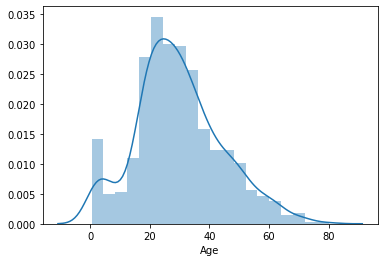

In [5]:
sns.distplot(df.Age.dropna())

<AxesSubplot:>

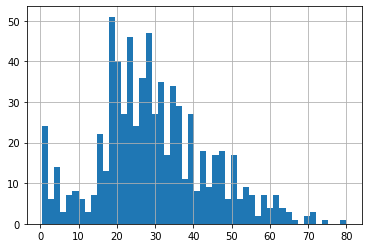

In [6]:
df.Age.hist(bins=50)

<AxesSubplot:xlabel='Age'>

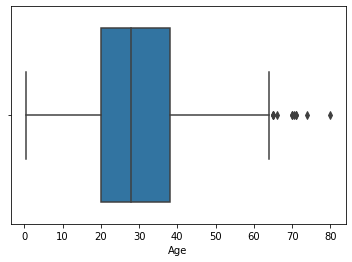

In [7]:
sns.boxplot(df.Age
           )

<AxesSubplot:>

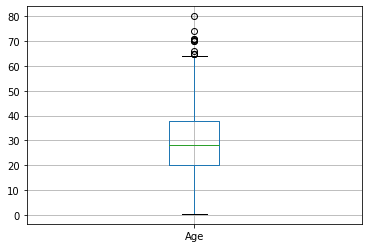

In [8]:
df.boxplot('Age')

In [9]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [10]:
upper_boundary=df.Age.mean()+3*df.Age.std()
lower_boundary=df.Age.mean()-3*df.Age.std()
print(f"Upper:{upper_boundary} , Lower:{lower_boundary}")

Upper:73.27860964406095 , Lower:-13.88037434994331


In [11]:
## BY IQR
IQR=df.Age.quantile(0.75)-df.Age.quantile(0.25)

In [12]:
IQR

17.875

In [13]:
lower_bridge=df.Age.quantile(0.25)-1.5*IQR

In [14]:
upper_bridge=df.Age.quantile(0.75)+1.5*IQR

In [15]:
print(upper_bridge,lower_bridge)

64.8125 -6.6875


# If feature is skewed

In [35]:
df.Fare.isnull().sum()

0

<AxesSubplot:>

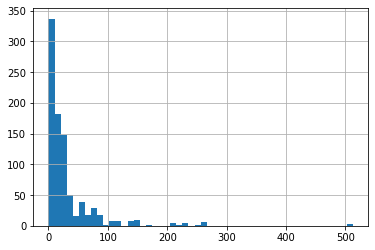

In [36]:
df.Fare.hist(bins=50)

In [37]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot:>

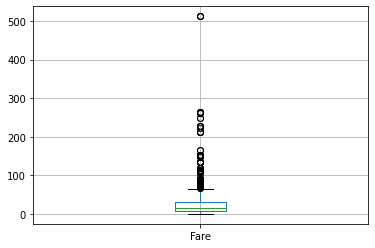

In [38]:
df.boxplot('Fare')

In [43]:
lower_boundary=df.Fare.mean()-3*df.Fare.std()
upper_boundary=df.Fare.mean()+3*df.Fare.std()
lower_boundary,upper_boundary

(-116.87607782296811, 181.2844937601173)

In [66]:
IQR=df.Fare.quantile(0.75)-df.Fare.quantile(0.25)

In [67]:
lower_bridge=df.Fare.quantile(0.25)-(3*IQR)
upper_bridge=df.Fare.quantile(0.75)+(3*IQR)

In [68]:
lower_bridge,upper_bridge

(-61.358399999999996, 100.2688)

In [82]:
data=df.copy()

In [83]:
data.loc[data['Age']>=73,'Age']=73

In [84]:
data.loc[data['Fare']>=100,'Fare']=100

<AxesSubplot:>

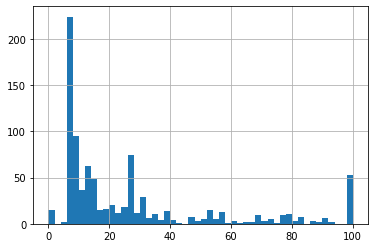

In [85]:
data.Fare.hist(bins=50)

<AxesSubplot:>

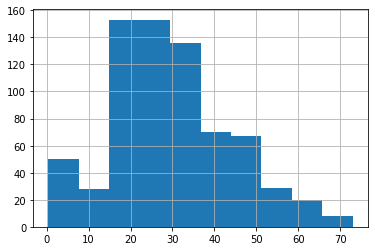

In [86]:
data.Age.hist()

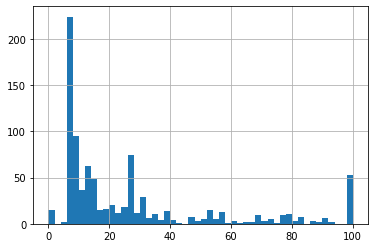

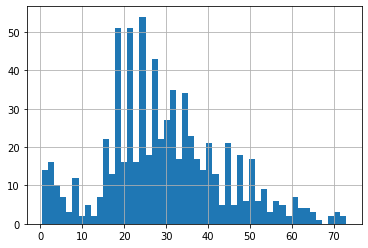

In [87]:
data.Fare.hist(bins=50)
plt.show()
data.Age.hist(bins=50)
plt.show()

# model training

In [88]:
from sklearn.model_selection import train_test_split

In [93]:
x_train,x_test,y_train,y_test=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

In [101]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
y_pred2=classifier.predict_proba(x_test)
from sklearn.metrics import accuracy_score, roc_auc_score
print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred2[:,1]))

0.6791044776119403
0.7288861327663595


In [110]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
y_pred2=classifier.predict_proba(x_test)
from sklearn.metrics import accuracy_score, roc_auc_score
print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred2[:,1]))

0.7126865671641791
0.7440054334987007
